In [1]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class BrainTumorDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        """
        Args:
            image_dir (str): Directory with all the images (NumPy files).
            mask_dir (str): Directory with all the masks (NumPy files).
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.image_filenames = sorted(os.listdir(image_dir))
        self.mask_filenames = sorted(os.listdir(mask_dir))
        
    def __len__(self):
        return len(self.image_filenames)
    
    def __getitem__(self, idx):
        # Load the image and mask
        image = torch.load(os.path.join(self.image_dir, self.image_filenames[idx]))
        mask = torch.load(os.path.join(self.mask_dir, self.mask_filenames[idx]))      
        return image, mask

image_dir = '.\BraTS20\BraTS2020_TrainingData\input_data_4channels\images\\'
mask_dir = '.\BraTS20\BraTS2020_TrainingData\input_data_4channels\masks\\'

dataset = BrainTumorDataset(image_dir=image_dir, mask_dir=mask_dir)

batch_size = 2
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# # Example loop over the DataLoader
# for batch_idx, (images, masks) in enumerate(dataloader):
#     print(f"Batch {batch_idx}")
#     print("Images shape:", images.shape)  
#     print("Masks shape:", masks.shape)    

In [2]:
# first_batch = next(iter(dataloader))
# first_batch= np.array(first_batch)
# first_batch.shape 

C:\Users\aadit\AppData\Local\Temp\ipykernel_110508\4103663884.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image = torch.load(os.path.join(self.image_dir, self.image

(2, 2, 128, 128, 128, 4)

In [6]:
# img, msk=first_batch
# img_num =1

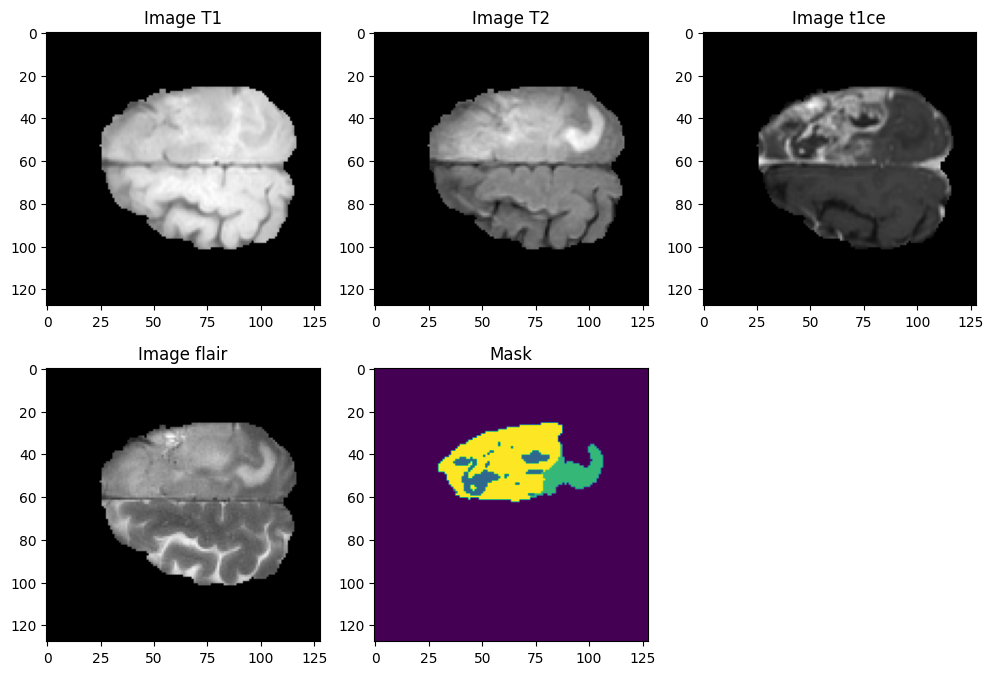

In [9]:
# from matplotlib import pyplot as plt
# import random

# test_img=img[img_num]
# test_mask=msk[img_num]
# test_mask=np.argmax(test_mask, axis=3)

# n_slice=random.randint(0, test_mask.shape[2])
# plt.figure(figsize=(12, 8))

# plt.subplot(231)
# plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
# plt.title('Image T1')
# plt.subplot(232)
# plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
# plt.title('Image T2')
# plt.subplot(233)
# plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
# plt.title('Image t1ce')
# plt.subplot(234)
# plt.imshow(test_img[:,:,n_slice, 3], cmap='gray')
# plt.title('Image flair')
# plt.subplot(235)
# plt.imshow(test_mask[:,:,n_slice])
# plt.title('Mask')
# plt.show()